In [1]:
import pandas as pd

# Loading the dataset
file_path = './valve_B_data.csv'
valve_data = pd.read_csv(file_path)

# Ensure that 'TAG_TIMESTAMP' is in the correct format
valve_data['TAG_TIMESTAMP'] = '00:' + valve_data['TAG_TIMESTAMP']

# Now converting 'LOCAL_TIME' to datetime and 'TAG_TIMESTAMP' to timedelta
valve_data['FULL_TIME'] = pd.to_datetime(valve_data['LOCAL_TIME']) + pd.to_timedelta(valve_data['TAG_TIMESTAMP'])

# Setting 'FULL_TIME' as the new index for time series analysis
valve_data.set_index('FULL_TIME', inplace=True)

# Keeping only the relevant columns: 'TAG_VALUE' for the valve pressure data
valve_data_time_series = valve_data[['TAG_VALUE']]

# Displaying the first few rows to confirm the correct datetime index
print(valve_data_time_series.head())

                           TAG_VALUE
FULL_TIME                           
2024-09-13 06:24:02.000     6.103702
2024-09-13 06:18:15.600  1221.961119
2024-09-13 06:04:43.400  1247.596667
2024-09-13 05:36:32.700  1273.232215
2024-09-13 05:34:20.600  1247.596667


In [2]:
#Checking for missing values count
missing_values_count = valve_data_time_series.isna().sum()
missing_values_count

TAG_VALUE    306
dtype: int64

In [3]:
valve_data.describe()

,TAG_VALUE
count,9466.000000
mean,1314.381183
std,387.669046
min,0.000000
25%,1312.295907
50%,1428.266243
75%,1516.159551
max,5000.000000


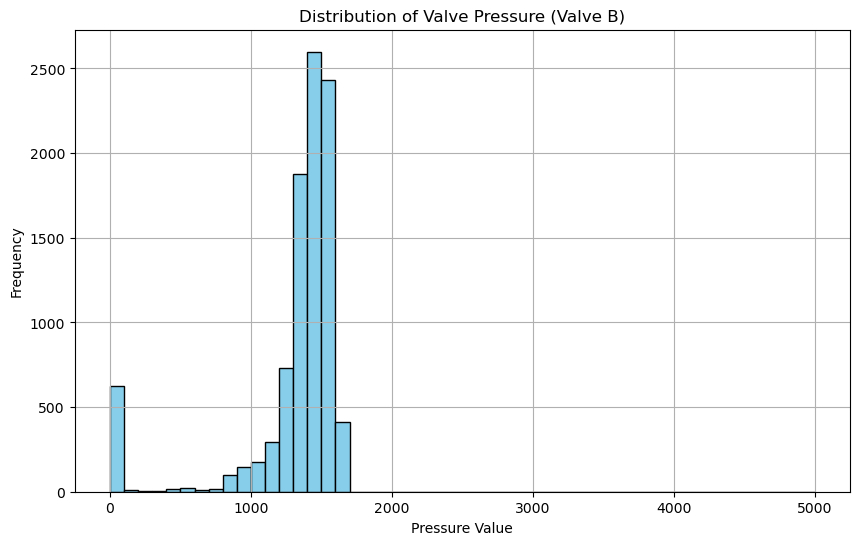

,TAG_VALUE
count,9466.000000
mean,1314.381183
std,387.669046
min,0.000000
25%,1312.295907
50%,1428.266243
75%,1516.159551
max,5000.000000


In [4]:
# Performing descriptive statistics
descriptive_stats = valve_data_time_series.describe()

# Plotting the distribution of the pressure values (TAG_VALUE)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(valve_data_time_series['TAG_VALUE'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Valve Pressure (Valve B)')
plt.xlabel('Pressure Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

descriptive_stats


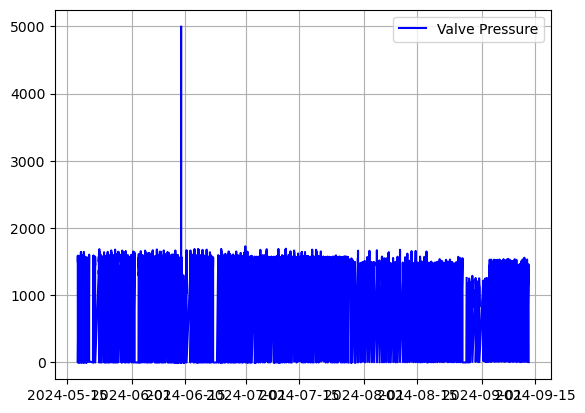

<Figure size 1200x800 with 0 Axes>

In [5]:
plt.plot(valve_data_time_series.index, valve_data_time_series['TAG_VALUE'], label='Valve Pressure', color='blue')
plt.legend()
plt.grid(True)
plt.figure(figsize=(12, 8))
plt.show()

In [6]:
# Filtering and displaying all the values that are greater than 2000
values_greater_than_2000 = valve_data_time_series[valve_data_time_series['TAG_VALUE'] > 2000]

# Displaying the first few rows to confirm
values_greater_than_2000.head()

,TAG_VALUE
FULL_TIME,
2024-06-13 22:42:12.600,5000.0


In [7]:
# Removing the point where the TAG_VALUE is 5000
filtered_data = valve_data_time_series[valve_data_time_series['TAG_VALUE'] != 5000]

# Interpolating the missing values
valve_data_interpolated = filtered_data.interpolate(method='linear')

# Counting how many missing values were filled
interpolated_points_count = valve_data_time_series.isna().sum().sum()
interpolated_points_count

# Confirming missing values are filled after interpolation
missing_values_after_interpolation = valve_data_interpolated.isna().sum().sum()


interpolated_points_count, missing_values_after_interpolation

(306, 0)

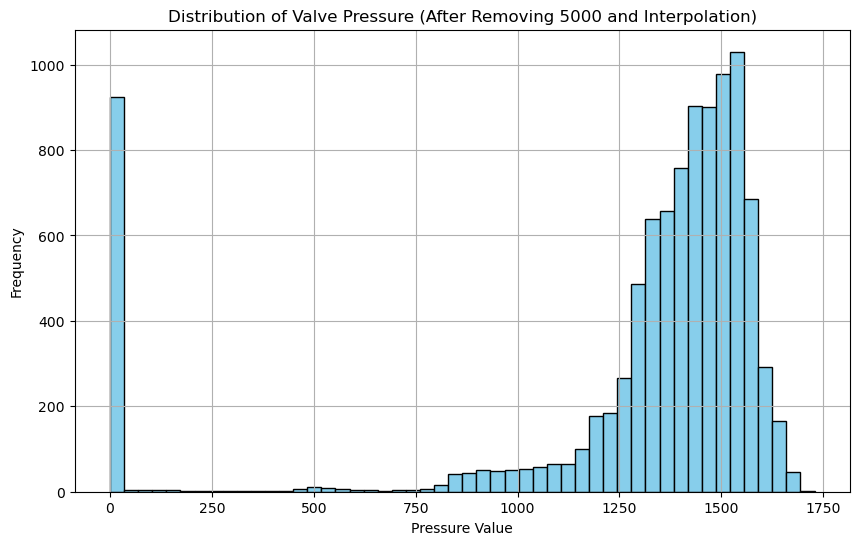

In [8]:
# Removing the point where the TAG_VALUE is 5000
filtered_data = valve_data_time_series[valve_data_time_series['TAG_VALUE'] != 5000]

# Interpolating the missing values
valve_data_interpolated = filtered_data.interpolate(method='linear')

# Re-plotting the distribution of the pressure values after removing 5000 and imputing missing values
plt.figure(figsize=(10, 6))
plt.hist(valve_data_interpolated['TAG_VALUE'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Valve Pressure (After Removing 5000 and Interpolation)')
plt.xlabel('Pressure Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\Chihnita\AppData\Local\Temp\ipykernel_38592\1462371819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valve_data_time_series['TAG_VALUE'] = valve_data_time_series['TAG_VALUE'].interpolate(method='linear')


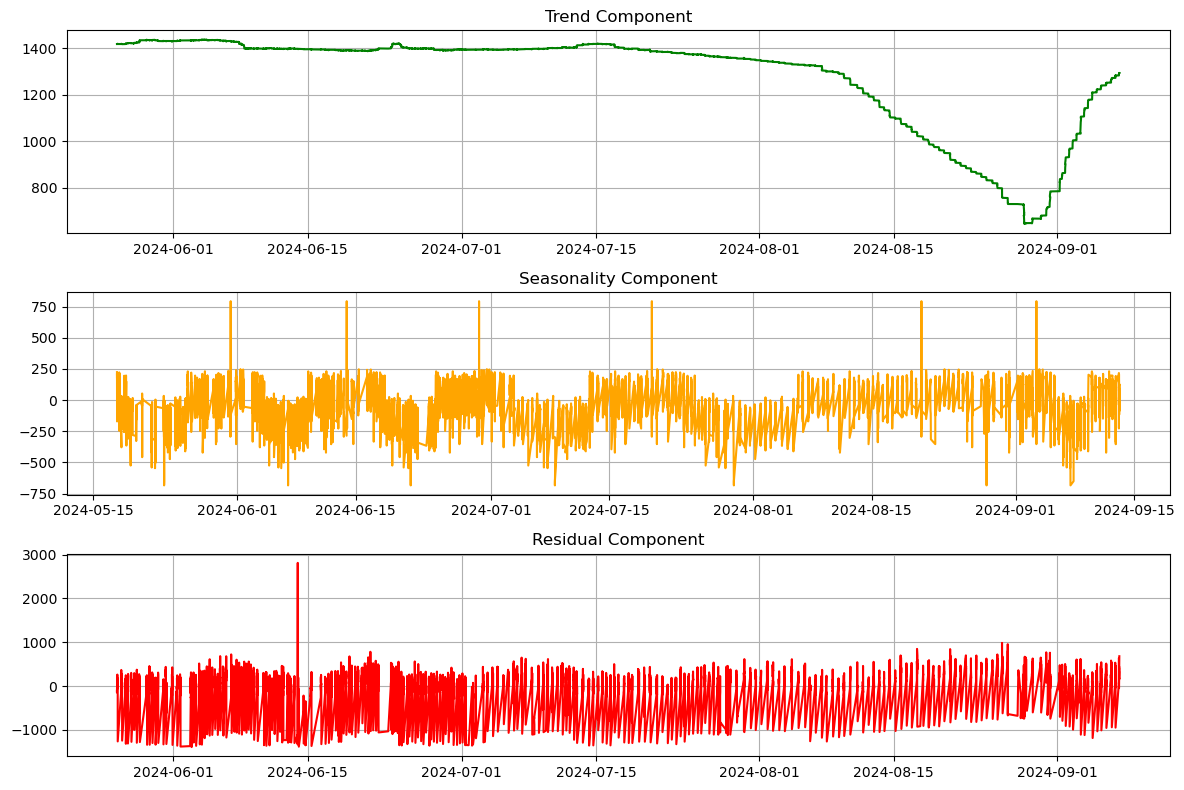

In [9]:
# Now proceeding with time series analysis, such as seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

valve_data_time_series['TAG_VALUE'] = valve_data_time_series['TAG_VALUE'].interpolate(method='linear')

# Performing seasonal decomposition
decomposition = seasonal_decompose(valve_data_time_series['TAG_VALUE'], model='additive', period=1440)

# Ploting the decomposition results
plt.figure(figsize=(12, 8))

# Ploting the trend
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.grid(True)

# Ploting the seasonality
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonality Component')
plt.grid(True)

# Ploting the residuals
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Sorting the index to ensure the datetime index is in chronological order
valve_data_time_series = valve_data_time_series.sort_index()

# Checking the first and last dates in the dataset to confirm available date range
print("First date in the dataset:", valve_data_time_series.index.min())
print("Last date in the dataset:", valve_data_time_series.index.max())


First date in the dataset: 2024-05-17 19:02:41.400000
Last date in the dataset: 2024-09-13 06:24:02


In [11]:
# After checking the available dates, selecting two valid consecutive days
two_day_data = valve_data_time_series.loc['2024-05-17':'2024-05-18']

# Interpolating missing values for this two-day period
two_day_data['TAG_VALUE'] = two_day_data['TAG_VALUE'].interpolate(method='linear')


C:\Users\Chihnita\AppData\Local\Temp\ipykernel_38592\2695535101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_day_data['TAG_VALUE'] = two_day_data['TAG_VALUE'].interpolate(method='linear')


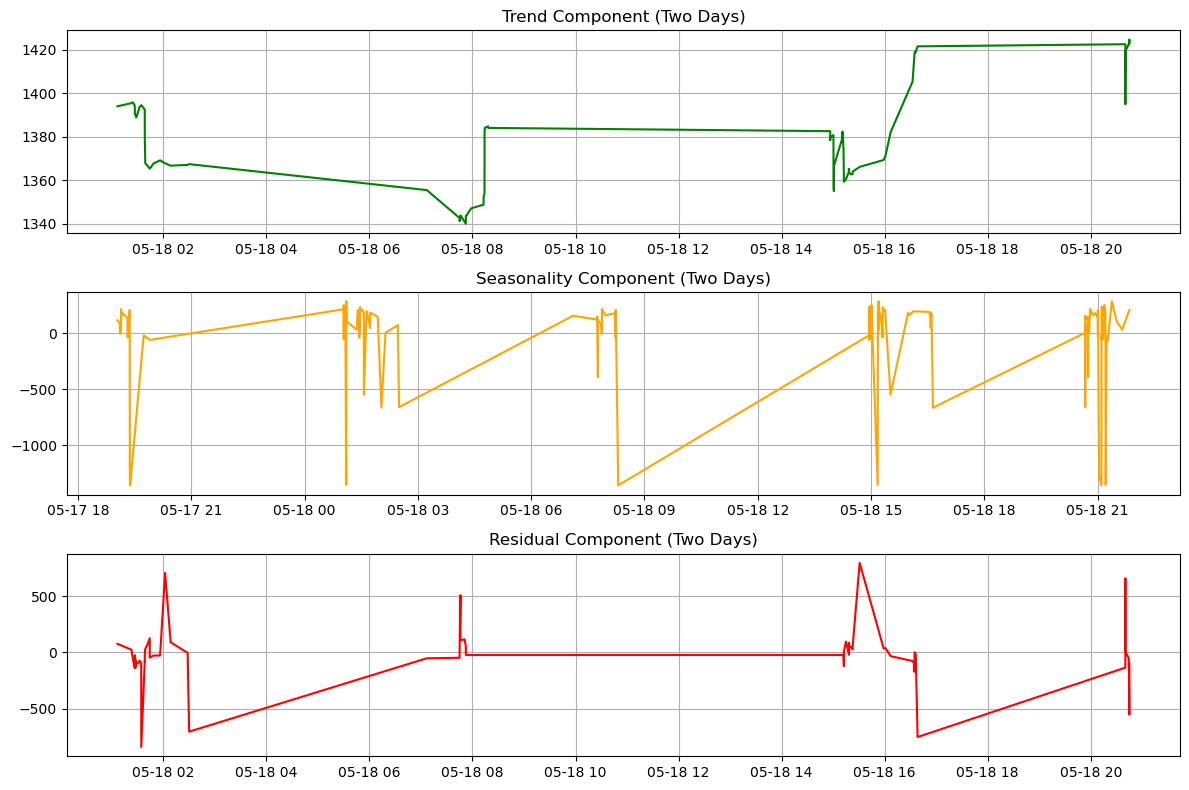

In [12]:
# Performing seasonal decomposition for two days with the original period
decomposition_two_days = seasonal_decompose(two_day_data['TAG_VALUE'], model='additive', period=60)

# Ploting the decomposition results for two days
plt.figure(figsize=(12, 8))

# Ploting the trend
plt.subplot(311)
plt.plot(decomposition_two_days.trend, label='Trend', color='green')
plt.title('Trend Component (Two Days)')
plt.grid(True)

# Ploting the seasonality
plt.subplot(312)
plt.plot(decomposition_two_days.seasonal, label='Seasonality', color='orange')
plt.title('Seasonality Component (Two Days)')
plt.grid(True)

# Ploting the residuals
plt.subplot(313)
plt.plot(decomposition_two_days.resid, label='Residual', color='red')
plt.title('Residual Component (Two Days)')
plt.grid(True)

plt.tight_layout()
plt.show()


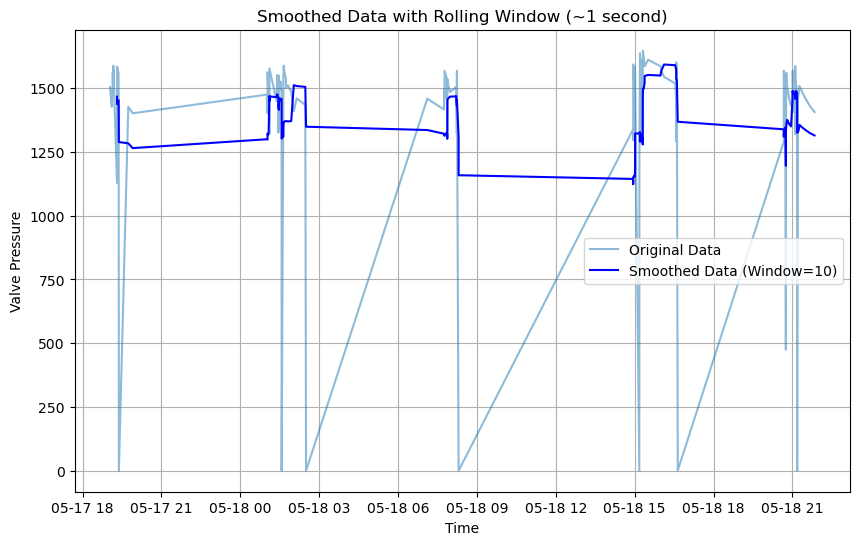

In [13]:
# Now applying the rolling window smoothing (~1 second)

window_size = 10  # Assuming ~10 data points per second
smoothed_data = two_day_data['TAG_VALUE'].rolling(window=window_size).mean()

# Ploting the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(two_day_data['TAG_VALUE'], label='Original Data', alpha=0.5)
plt.plot(smoothed_data, label=f'Smoothed Data (Window={window_size})', color='blue')
plt.title('Smoothed Data with Rolling Window (~1 second)')
plt.xlabel('Time')
plt.ylabel('Valve Pressure')
plt.legend()
plt.grid(True)
plt.show()

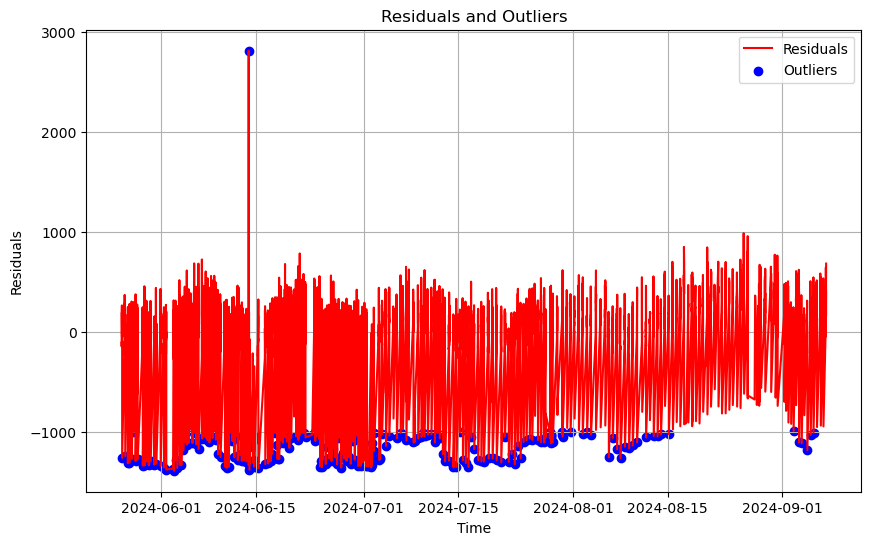

In [14]:
# Residual outlier detection
residuals = decomposition.resid.dropna()

# Calculating standard deviation of residuals
residual_std = residuals.std()

# Defining outliers as points where the residuals exceed 2 standard deviations
outliers = residuals[abs(residuals) > (3* residual_std)]

# Ploting residuals and outliers
plt.figure(figsize=(10, 6))

# Ploting the residuals
plt.plot(residuals, label='Residuals', color='red')

# Highlighting the outliers
plt.scatter(outliers.index, outliers, color='blue', label='Outliers')

plt.title('Residuals and Outliers')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

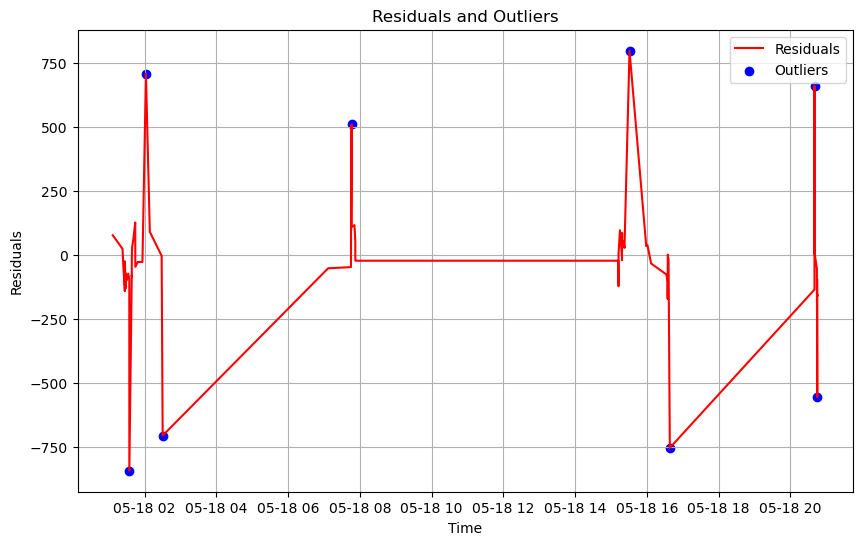

In [15]:
# Residuals from the decomposition
residuals = decomposition_two_days.resid.dropna()

# Calculating standard deviation of residuals
residual_std = residuals.std()

# Defining outliers as points where the residuals exceed 2 standard deviations
outliers = residuals[abs(residuals) > (2 * residual_std)]

# Ploting residuals and outliers
plt.figure(figsize=(10, 6))

# Ploting the residuals
plt.plot(residuals, label='Residuals', color='red')

# Highlighting the outliers
plt.scatter(outliers.index, outliers, color='blue', label='Outliers')

plt.title('Residuals and Outliers')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Checking for missing values in the interpolated data
missing_values_check = valve_data_interpolated.isna().sum()

# Displaying the missing values count
missing_values_check

TAG_VALUE    0
dtype: int64

In [17]:
valve_data_interpolated.head()

,TAG_VALUE
FULL_TIME,
2024-09-13 06:24:02.000,6.103702
2024-09-13 06:18:15.600,1221.961119
2024-09-13 06:04:43.400,1247.596667
2024-09-13 05:36:32.700,1273.232215
2024-09-13 05:34:20.600,1247.596667


In [18]:
resampled_data = valve_data_interpolated.resample('5S').mean()

#Code Cell 16:
# Ensure residuals are aligned with valve_data_interpolated
residuals_aligned = residuals.reindex(valve_data_interpolated.index)

Valid Signatures: 257
Invalid Signatures: 0


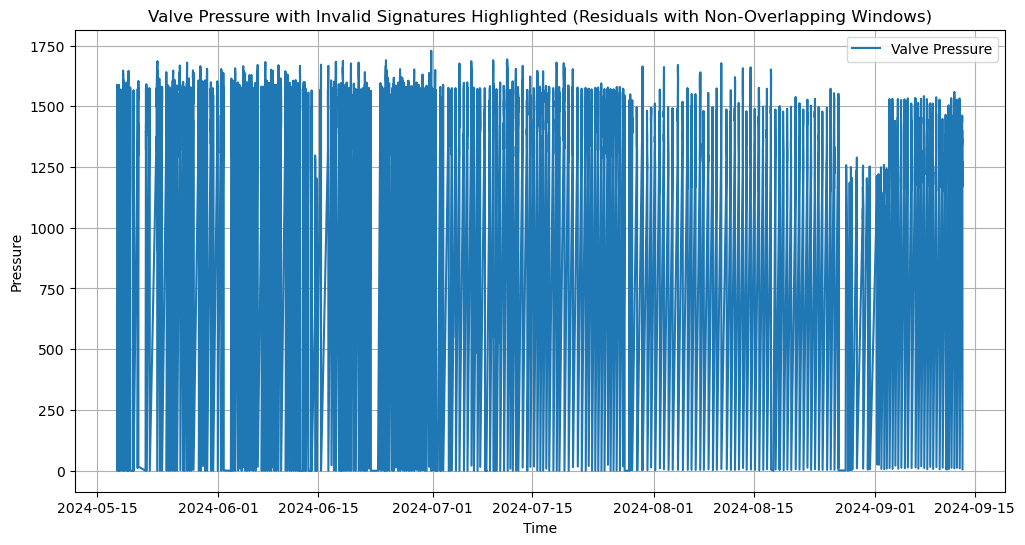

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to create non-overlapping windows of the data
def create_non_overlapping_windows(data, window_size):
    windows = []
    for i in range(0, len(data) - window_size + 1, window_size):
        window = data[i:i + window_size]
        windows.append(window)
    return np.array(windows)

# Set the window size (e.g., 60 points per window)
window_size = 38

# Create non-overlapping windows for both the valve pressure data and residuals
valve_windows = create_non_overlapping_windows(valve_data_interpolated['TAG_VALUE'].values, window_size)
residuals_windows = create_non_overlapping_windows(residuals_aligned.values, window_size)

# Calculate the mean residual for each window
mean_residuals_per_window = np.mean(np.abs(residuals_windows), axis=1)

# Define the threshold for outliers (2 standard deviations of residuals)
residual_std = mean_residuals_per_window.std()
threshold = 2.5 * residual_std

# Classify windows as valid or invalid based on the residual threshold
validity = np.where(mean_residuals_per_window > threshold, 'invalid', 'valid')

# Count the valid and invalid windows
valid_count = np.sum(validity == 'valid')
invalid_count = np.sum(validity == 'invalid')

# Display the count of valid and invalid windows
print(f'Valid Signatures: {valid_count}')
print(f'Invalid Signatures: {invalid_count}')

# Visualize the results by plotting the data and highlighting invalid windows
plt.figure(figsize=(12, 6))

# Plot the original valve pressure data
plt.plot(valve_data_interpolated.index, valve_data_interpolated['TAG_VALUE'], label='Valve Pressure')

# Highlight invalid windows on the graph
invalid_windows_idx = np.where(validity == 'invalid')[0]
for idx in invalid_windows_idx:
    plt.axvspan(valve_data_interpolated.index[idx * window_size], valve_data_interpolated.index[(idx + 1) * window_size - 1],
                color='red', alpha=0.3)

plt.title('Valve Pressure with Invalid Signatures Highlighted (Residuals with Non-Overlapping Windows)')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Verifying that the number of data points matches the expected 9772
print(f"Total number of data points: {len(valve_data_interpolated)}")


Total number of data points: 9771


In [21]:
pip install keras tensorflow

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.25 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
ydata-profiling 4.1.0 requires matplotlib<3.7,>=3.2, but you have matplotlib 3.8.0 which is incompatible.
ydata-profiling 4.1.0 requires requests<2.29,>=2.24.0, but you have requests 2.31.0 which is incompatible.
ydata-profiling 4.1.0 requires scipy<1.10,>=1.4.1, but you have scipy 1.11.4 which is incompatible.
ydata-profiling 4.1.0 requires statsmodels<0.14,>=0.13.2, but you have statsmodels 0.14.0 which is incompatible.
ydata-profiling 4.1.0 requires tqdm<4.65,>=4.48.2, but you have tqdm 4.65.0 which is incompatible.


In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Define a function to create sliding windows of the data
# Define a function for non-overlapping windows
def create_non_overlapping_windows(data, window_size):
    windows = []
    for i in range(0, len(data) - window_size + 1, window_size):  # Step by window_size
        window = data[i:i+window_size]
        windows.append(window)
    return np.array(windows)
window_size = 38
# Create non-overlapping windows
X_train_windows = create_non_overlapping_windows(valve_data_interpolated['TAG_VALUE'].values, window_size)

# Reshape for training the autoencoder (samples, window_size)
X_train_windows = X_train_windows.reshape(X_train_windows.shape[0], window_size)

# Proceed with the autoencoder training and validation as before

# Define the autoencoder model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(window_size,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=window_size, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = model.fit(X_train_windows, X_train_windows, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Reconstruct the windows using the trained autoencoder
reconstructed_windows = model.predict(X_train_windows)

# Calculate the reconstruction error for each window
reconstruction_errors = np.mean(np.abs(X_train_windows - reconstructed_windows), axis=1)

# Set a threshold for detecting anomalies based on reconstruction error
threshold = np.percentile(reconstruction_errors, 99)  # For example, top 1% are anomalies

# Mark windows as 'valid' or 'invalid' based on reconstruction error
validity = np.where(reconstruction_errors > threshold, 'invalid', 'valid')

# Count valid and invalid signatures
valid_count = np.sum(validity == 'valid')
invalid_count = np.sum(validity == 'invalid')

print(f'Valid Signatures: {valid_count}')
print(f'Invalid Signatures: {invalid_count}')

Epoch 1/50
8/8 [==============================] - 2s 48ms/step - loss: 1812289.2500 - val_loss: 1846726.2500
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1474587.2500 - val_loss: 1511942.7500
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 1153420.1250 - val_loss: 1079460.5000
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 811420.3750 - val_loss: 767366.0625
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 584594.3750 - val_loss: 517715.0312
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 381251.7812 - val_loss: 322585.1562
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 233974.5312 - val_loss: 186499.6875
Epoch 8/50
8/8 [==============================] - 0s 10ms/step - loss: 143774.9688 - val_loss: 120145.5078
Epoch 9/50
8/8 [==============================] - 0s 10ms/step - loss: 104162.5703 - val_loss: 101030.8594
Epoch 10/50
8/8 [===================

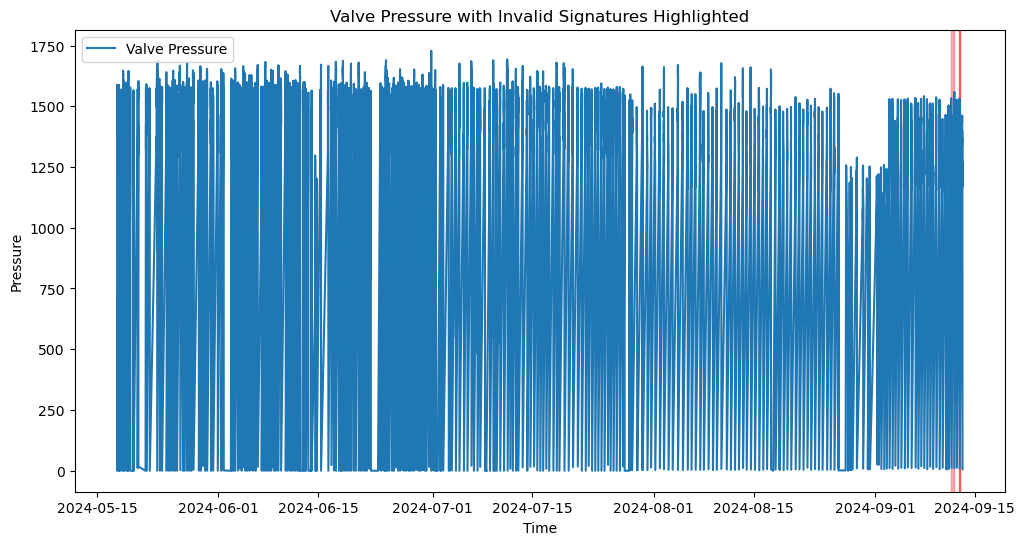

In [23]:
import matplotlib.pyplot as plt

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(valve_data_interpolated.index, valve_data_interpolated['TAG_VALUE'], label='Valve Pressure')

# Highlight invalid signatures
invalid_windows_idx = np.where(validity == 'invalid')[0]
for idx in invalid_windows_idx:
    plt.axvspan(valve_data_interpolated.index[idx], valve_data_interpolated.index[idx + window_size], color='red', alpha=0.3)

plt.title('Valve Pressure with Invalid Signatures Highlighted')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.show()


In [24]:
import numpy as np
from sklearn.ensemble import IsolationForest
import pandas as pd
# Define a function for non-overlapping windows
def create_non_overlapping_windows(data, window_size):
    windows = []
    for i in range(0, len(data) - window_size + 1, window_size):  # Step by window_size
        window = data[i:i+window_size]
        windows.append(window)
    return np.array(windows)
window_size = 38
# Create non-overlapping windows
X_windows = create_non_overlapping_windows(valve_data_interpolated['TAG_VALUE'].values, window_size)

# The rest of the code remains the same as above

# Train an Isolation Forest on these windows
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination level
iso_forest.fit(X_windows)

# Predict anomaly scores for each window (-1 for anomaly, 1 for normal)
anomaly_scores = iso_forest.predict(X_windows)

# Mark the windows as valid or invalid based on the anomaly scores
validity = np.where(anomaly_scores == -1, 'invalid', 'valid')

# Count valid and invalid windows
valid_count = np.sum(validity == 'valid')
invalid_count = np.sum(validity == 'invalid')

print(f'Valid Signatures: {valid_count}')
print(f'Invalid Signatures: {invalid_count}')


Valid Signatures: 231
Invalid Signatures: 26


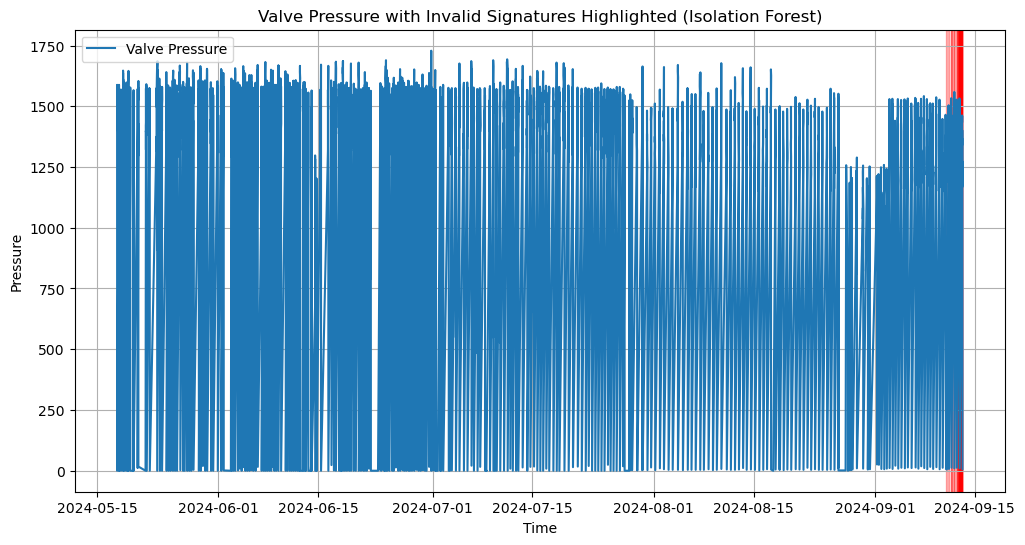

In [25]:
# Visualize the results by plotting the data and highlighting invalid windows
plt.figure(figsize=(12, 6))

# Plot the original valve pressure data
plt.plot(valve_data_interpolated.index, valve_data_interpolated['TAG_VALUE'], label='Valve Pressure')

# Highlight invalid windows on the graph
invalid_windows_idx = np.where(validity == 'invalid')[0]
for idx in invalid_windows_idx:
    plt.axvspan(valve_data_interpolated.index[idx], valve_data_interpolated.index[idx + window_size],
                color='red', alpha=0.3)

plt.title('Valve Pressure with Invalid Signatures Highlighted (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
resampled_data = valve_data_interpolated.resample('5S').mean()

#---

#Code Cell 16:
# Ensure residuals are aligned with valve_data_interpolated
residuals_aligned = residuals.reindex(valve_data_interpolated.index)

Valid Signatures: 257
Invalid Signatures: 0


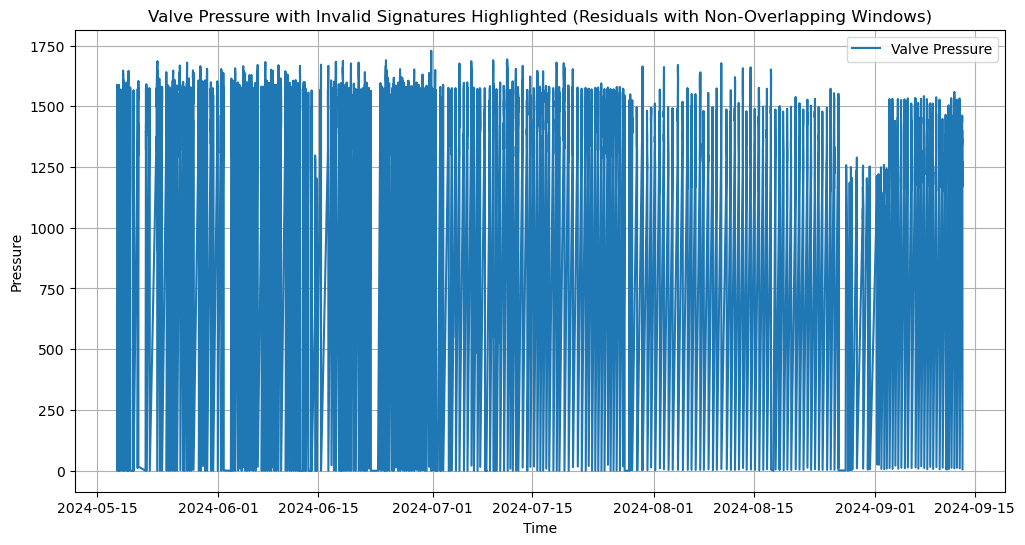

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to create non-overlapping windows of the data
def create_non_overlapping_windows(data, window_size):
    windows = []
    for i in range(0, len(data) - window_size + 1, window_size):
        window = data[i:i + window_size]
        windows.append(window)
    return np.array(windows)

# Set the window size (e.g., 60 points per window)
window_size = 38

# Create non-overlapping windows for both the valve pressure data and residuals
valve_windows = create_non_overlapping_windows(valve_data_interpolated['TAG_VALUE'].values, window_size)
residuals_windows = create_non_overlapping_windows(residuals_aligned.values, window_size)

# Calculate the mean residual for each window
mean_residuals_per_window = np.mean(np.abs(residuals_windows), axis=1)

# Define the threshold for outliers (2 standard deviations of residuals)
residual_std = mean_residuals_per_window.std()
threshold = 2 * residual_std

# Classify windows as valid or invalid based on the residual threshold
validity = np.where(mean_residuals_per_window > threshold, 'invalid', 'valid')

# Count the valid and invalid windows
valid_count = np.sum(validity == 'valid')
invalid_count = np.sum(validity == 'invalid')

# Display the count of valid and invalid windows
print(f'Valid Signatures: {valid_count}')
print(f'Invalid Signatures: {invalid_count}')

# Visualize the results by plotting the data and highlighting invalid windows
plt.figure(figsize=(12, 6))

# Plot the original valve pressure data
plt.plot(valve_data_interpolated.index, valve_data_interpolated['TAG_VALUE'], label='Valve Pressure')

# Highlight invalid windows on the graph
invalid_windows_idx = np.where(validity == 'invalid')[0]
for idx in invalid_windows_idx:
    plt.axvspan(valve_data_interpolated.index[idx * window_size], valve_data_interpolated.index[(idx + 1) * window_size - 1],
                color='red', alpha=0.3)

plt.title('Valve Pressure with Invalid Signatures Highlighted (Residuals with Non-Overlapping Windows)')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.show()


Valid Signatures: 48
Invalid Signatures: 209


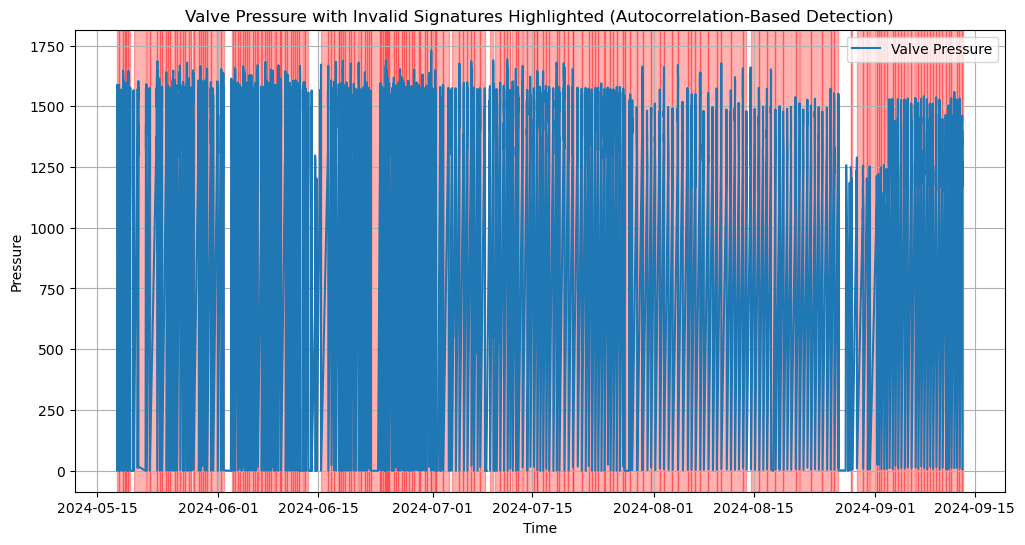

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Define a function to create non-overlapping windows of the data
def create_non_overlapping_windows(data, window_size):
    windows = []
    for i in range(0, len(data) - window_size + 1, window_size):
        window = data[i:i + window_size]
        windows.append(window)
    return np.array(windows)

# Set the window size (e.g., 60 points per window)
window_size = 38

# Create non-overlapping windows for the valve pressure data
valve_windows = create_non_overlapping_windows(valve_data_interpolated['TAG_VALUE'].values, window_size)

# Calculate the autocorrelation for each window and take the first lag (lag-1 autocorrelation)
autocorrelations = [acf(window, nlags=1)[1] for window in valve_windows]

# Convert the list of autocorrelations to a NumPy array
autocorrelations = np.array(autocorrelations)

# Define a threshold for detecting anomalies (e.g., very low or negative autocorrelation)
autocorr_threshold = 0.5  # This can be adjusted based on the expected correlation

# Classify windows as valid or invalid based on the autocorrelation threshold
validity = np.where(autocorrelations < autocorr_threshold, 'invalid', 'valid')

# Count the valid and invalid windows
valid_count = np.sum(validity == 'valid')
invalid_count = np.sum(validity == 'invalid')

# Display the count of valid and invalid windows
print(f'Valid Signatures: {valid_count}')
print(f'Invalid Signatures: {invalid_count}')

# Visualize the results by plotting the data and highlighting invalid windows
plt.figure(figsize=(12, 6))

# Plot the original valve pressure data
plt.plot(valve_data_interpolated.index, valve_data_interpolated['TAG_VALUE'], label='Valve Pressure')

# Highlight invalid windows on the graph
invalid_windows_idx = np.where(validity == 'invalid')[0]
for idx in invalid_windows_idx:
    plt.axvspan(valve_data_interpolated.index[idx * window_size], valve_data_interpolated.index[(idx + 1) * window_size - 1],
                color='red', alpha=0.3)

plt.title('Valve Pressure with Invalid Signatures Highlighted (Autocorrelation-Based Detection)')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.show()
